# [CDAF] Atividade 1

## Nome e matrícula
Nome: Júlio Guerra Domingues
Matrícula: 2022431280

Nome: Leandro Luiz Duarte Teixeira
Matrícula: 2024006099

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas:
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [ ]:
!wget https://github.com/juliogdomingues/cdaf_ufmg/raw/refs/heads/main/At1/TrainingSet_2023_02_08.xlsx

--2025-03-23 15:23:26--  https://github.com/juliogdomingues/cdaf_ufmg/raw/refs/heads/main/At1/TrainingSet_2023_02_08.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juliogdomingues/cdaf_ufmg/refs/heads/main/At1/TrainingSet_2023_02_08.xlsx [following]
--2025-03-23 15:23:27--  https://raw.githubusercontent.com/juliogdomingues/cdaf_ufmg/refs/heads/main/At1/TrainingSet_2023_02_08.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13148388 (13M) [application/octet-stream]
Saving to: ‘TrainingSet_2023_02_08.xlsx’

TrainingSet_2023_02 100%[===================>]  12.54M  77.7MB/s    in 0.2s    



In [ ]:
df = pd.read_excel('TrainingSet_2023_02_08.xlsx')

In [ ]:
df.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,TotalGoals
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W,1
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W,5
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W,4
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D,4
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L,1


array([[<Axes: title={'center': 'HS'}>]], dtype=object)

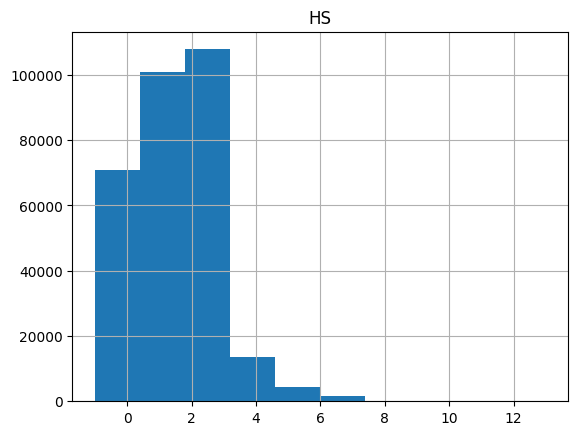

In [ ]:
# quantidade de gols marcados por jogo pelos times mandantes
df.hist(column="HS")

array([[<Axes: title={'center': 'AS'}>]], dtype=object)

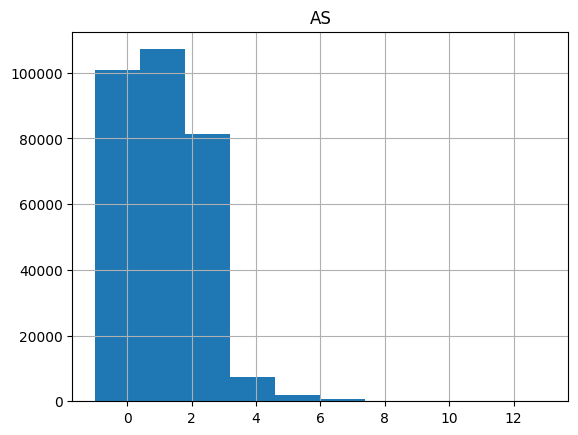

In [ ]:
# quantidade de gols marcados por jogo pelos time visitantes
df.hist(column="AS")

array([[<Axes: title={'center': 'TotalGoals'}>]], dtype=object)

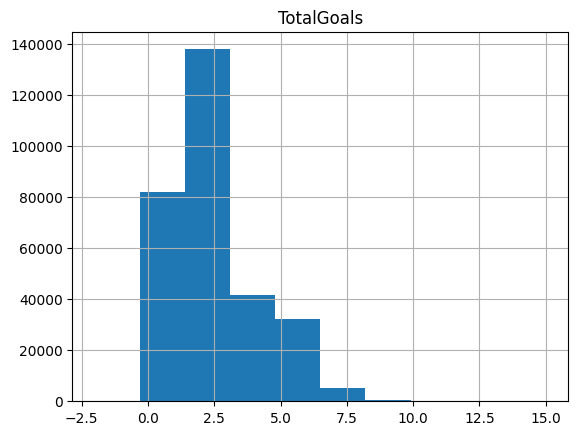

In [ ]:
# quantidade total de gols em cada partida
df['TotalGoals'] = df['HS'] + df['AS']
df.hist(column='TotalGoals')

# df[['HS', 'AS']].sum(axis=1).hist()

array([[<Axes: title={'center': 'GD'}>]], dtype=object)

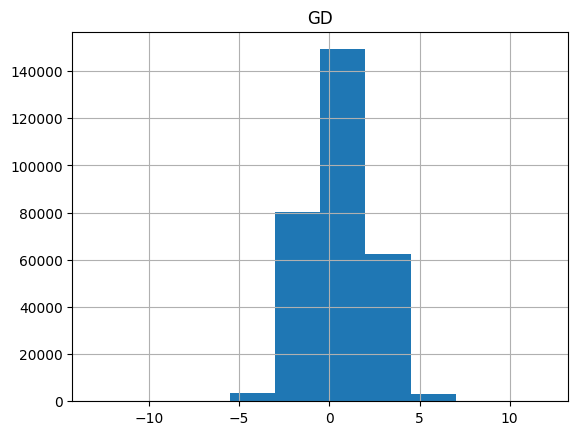

In [ ]:
# diferença de gols por partida
df.hist(column="GD")

## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

In [ ]:
df['Lge'].unique()

array(['GER1', 'ENG1', 'ENG2', 'ENG3', 'ENG4', 'ITA1', 'ITA2', 'HOL1',
       'SCO1', 'SCO2', 'SCO3', 'SCO4', 'SPA1', 'SPA2', 'FRA1', 'FRA2',
       'BEL1', 'GRE1', 'POR1', 'ARG1', 'RUS1', 'CHN1', 'AUS1', 'CHE1',
       'SWE1', 'AUT1', 'DNK1', 'GER2', 'MEX1', 'ISR1', 'FIN1', 'BRA1',
       'JPN1', 'KOR1', 'ZAF1', 'CHL1', 'ENG5', 'NZL1', 'DZA1', 'MAR1',
       'TUN1', 'ECU1', 'VEN1', 'GER3', 'NOR1', 'USA1', 'FRA3', 'RUS2',
       'USA2', 'BRA2', 'JPN2'], dtype=object)

In [ ]:
df['Sea'].unique()

array(['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
       '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
       '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21',
       '21-22', '22-23', '23-24'], dtype=object)

In [ ]:
# Liga escolhida: Premier League
# Temporada escolhida: 15-16

df_pl1516 = df[(df['Sea'] == '15-16') & (df['Lge'] == 'ENG1')].copy()

In [ ]:
# Função para calcular e exibir métricas estatísticas
from scipy import stats

def calcular_metricas(dados, titulo):
    media = dados.mean()
    mediana = dados.median()

    # Cálculo da moda
    try:
        moda_resultado = stats.mode(dados, keepdims=True)  # Calcula a moda
        moda = moda_resultado.mode[0] if moda_resultado.count[0] > 1 else "N/A"  # Verifica se há moda
    except:
        # Se stats.mode falhar, calculamos a moda manualmente
        valores, contagens = np.unique(dados, return_counts=True)
        if np.max(contagens) > 1:  # Se houver pelo menos um valor que se repete
            moda = valores[np.argmax(contagens)]  # Pega o valor com a maior contagem
        else:
            moda = "N/A"  # Caso contrário, não há moda

    desvio_padrao = dados.std()

    print(f"{titulo}:")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda}")
    print(f"Desvio Padrão: {desvio_padrao:.2f}")
    print("-" * 30)

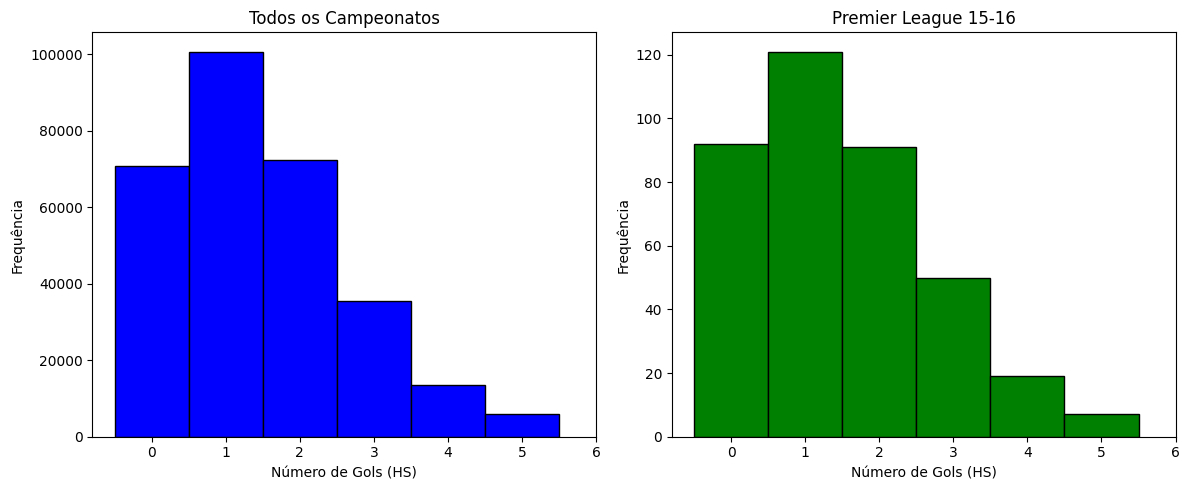

Métricas para Todos os Campeonatos:
Média: 1.47
Mediana: 1.00
Moda: 1
Desvio Padrão: 1.25
------------------------------
Métricas para Premier League 15-16 (HS):
Média: 1.49
Mediana: 1.00
Moda: 1
Desvio Padrão: 1.26
------------------------------


In [ ]:
# quantidade de gols marcados por jogo pelos times mandantes

# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para todos os campeonatos (df)
axes[0].hist(df['HS'], bins=range(0, 7), edgecolor='black', align='left', color='blue')
axes[0].set_xlabel('Número de Gols (HS)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Todos os Campeonatos')
axes[0].set_xticks(range(0, 7))

# Histograma para o campeonato específico (df_pl1516)
axes[1].hist(df_pl1516['HS'], bins=range(0, 7), edgecolor='black', align='left', color='green')
axes[1].set_xlabel('Número de Gols (HS)')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Premier League 15-16')
axes[1].set_xticks(range(0, 7))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()

calcular_metricas(df['HS'], "Métricas para Todos os Campeonatos")
calcular_metricas(df_pl1516['HS'], "Métricas para Premier League 15-16 (HS)")


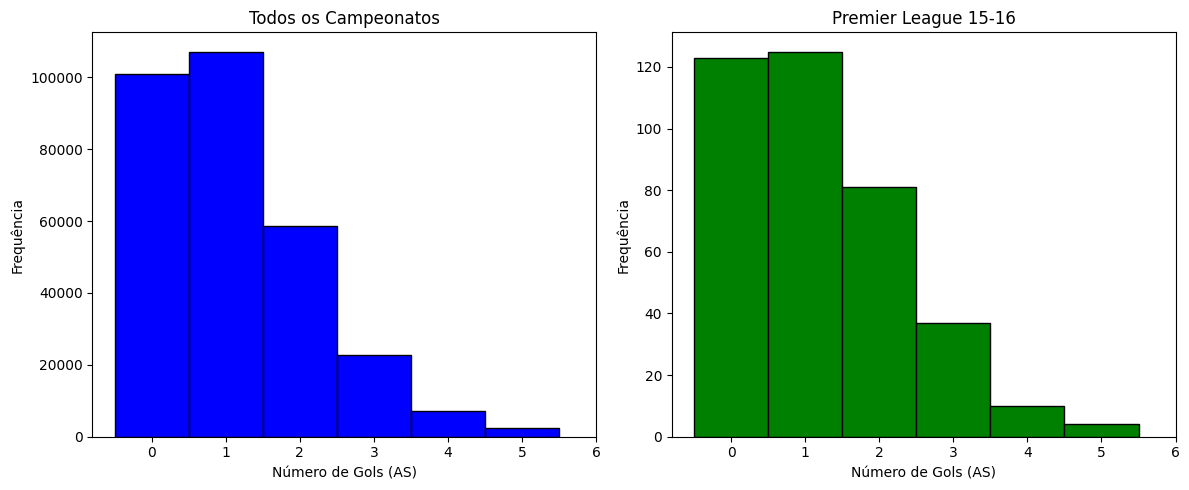

Métricas para Todos os Campeonatos:
Média: 1.12
Mediana: 1.00
Moda: 1
Desvio Padrão: 1.10
------------------------------
Métricas para Premier League 15-16 (HS):
Média: 1.21
Mediana: 1.00
Moda: 1
Desvio Padrão: 1.15
------------------------------


In [ ]:
# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para todos os campeonatos (df) - Coluna AS
axes[0].hist(df['AS'], bins=range(0, 7), edgecolor='black', align='left', color='blue')
axes[0].set_xlabel('Número de Gols (AS)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Todos os Campeonatos')
axes[0].set_xticks(range(0, 7))

# Histograma para o campeonato específico (df_pl1516) - Coluna AS
axes[1].hist(df_pl1516['AS'], bins=range(0, 7), edgecolor='black', align='left', color='green')
axes[1].set_xlabel('Número de Gols (AS)')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Premier League 15-16')
axes[1].set_xticks(range(0, 7))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()


calcular_metricas(df['AS'], "Métricas para Todos os Campeonatos")
calcular_metricas(df_pl1516['AS'], "Métricas para Premier League 15-16 (HS)")

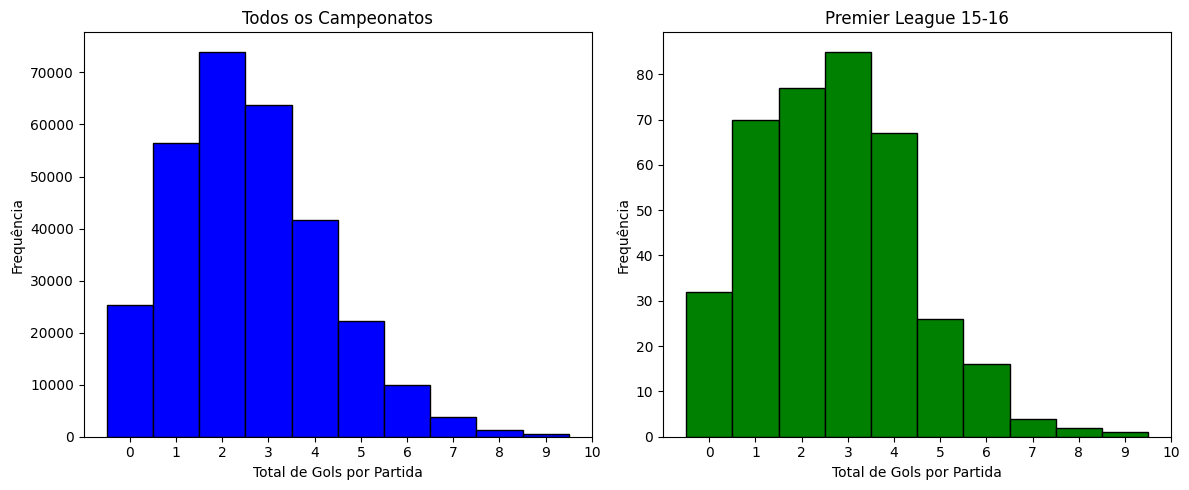

Métricas para Todos os Campeonatos:
Média: 2.59
Mediana: 2.00
Moda: 2
Desvio Padrão: 1.65
------------------------------
Métricas para Premier League 15-16 (HS):
Média: 2.70
Mediana: 3.00
Moda: 3
Desvio Padrão: 1.68
------------------------------


In [ ]:
# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para todos os campeonatos (df) - Total de Gols por Partida
df['TotalGoals'] = df['HS'] + df['AS']  # Calcula o total de gols por partida
axes[0].hist(df['TotalGoals'], bins=range(0, 11), edgecolor='black', align='left', color='blue')
axes[0].set_xlabel('Total de Gols por Partida')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Todos os Campeonatos')
axes[0].set_xticks(range(0, 11))

# Histograma para o campeonato específico (df_pl1516) - Total de Gols por Partida
df_pl1516['TotalGoals'] = df_pl1516['HS'] + df_pl1516['AS']  # Calcula o total de gols por partida
axes[1].hist(df_pl1516['TotalGoals'], bins=range(0, 11), edgecolor='black', align='left', color='green')
axes[1].set_xlabel('Total de Gols por Partida')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Premier League 15-16')
axes[1].set_xticks(range(0, 11))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()


calcular_metricas(df['HS'] + df['AS'], "Métricas para Todos os Campeonatos")
calcular_metricas(df_pl1516['HS'] + df_pl1516['AS'], "Métricas para Premier League 15-16 (HS)")

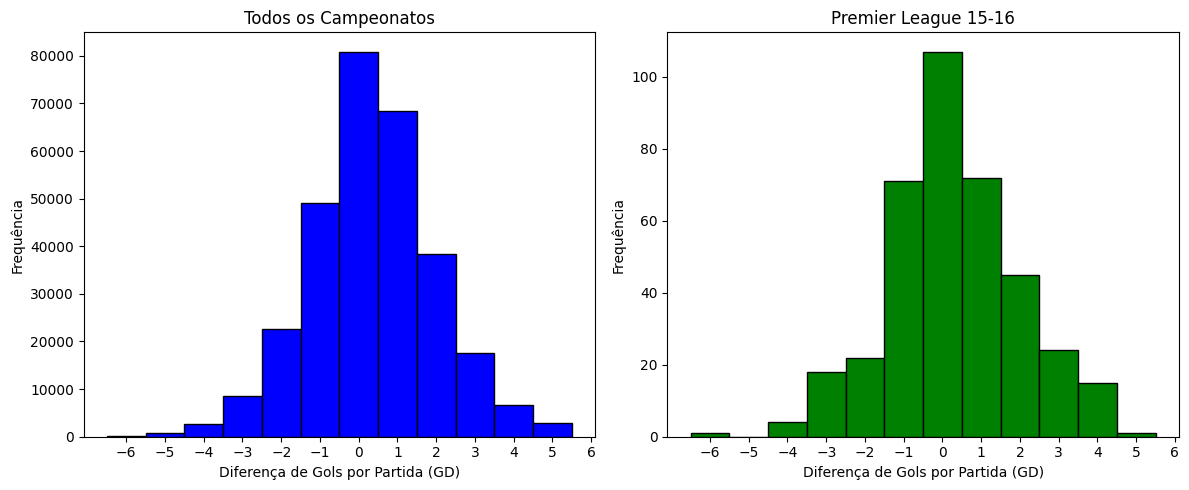

Métricas para Todos os Campeonatos:
Média: 0.35
Mediana: 0.00
Moda: 0
Desvio Padrão: 1.67
------------------------------
Métricas para Premier League 15-16 (HS):
Média: 0.28
Mediana: 0.00
Moda: 0
Desvio Padrão: 1.72
------------------------------


In [ ]:
# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para todos os campeonatos (df) - Diferença de Gols por Partida (GD)
axes[0].hist(df['GD'], bins=range(-6, 7), edgecolor='black', align='left', color='blue')
axes[0].set_xlabel('Diferença de Gols por Partida (GD)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Todos os Campeonatos')
axes[0].set_xticks(range(-6, 7))

# Histograma para o campeonato específico (df_pl1516) - Diferença de Gols por Partida (GD)
axes[1].hist(df_pl1516['GD'], bins=range(-6, 7), edgecolor='black', align='left', color='green')
axes[1].set_xlabel('Diferença de Gols por Partida (GD)')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Premier League 15-16')
axes[1].set_xticks(range(-6, 7))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()


calcular_metricas(df['GD'], "Métricas para Todos os Campeonatos")
calcular_metricas(df_pl1516['GD'], "Métricas para Premier League 15-16 (HS)")

####**Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?**

<p>A Premier League 15-16 apresentou características no geral bem semelhantes com os demais. Nota-se média de gols por partida um pouco maior (2.70 vs. 2.59) e uma moda de 3 gols (contra 2 na média geral). Os times visitantes foram mais competitivos, marcando mais gols em média (1.21 vs. 1.12), enquanto a diferença de gols por partida foi menor (0.28 vs. 0.35), indicando jogos mais equilibrados.</p>

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [ ]:
df_pl1516.loc[:, "Date"] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df_pl1516.sort_values(by="Date", ascending=True)

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,TotalGoals
185305,15-16,ENG1,2015-08-08 00:00:00,Bournemouth,Aston Villa,0,1,-1,L,1
185306,15-16,ENG1,2015-08-08 00:00:00,Chelsea,Swansea City,2,2,0,D,4
185307,15-16,ENG1,2015-08-08 00:00:00,Everton,Watford,2,2,0,D,4
185308,15-16,ENG1,2015-08-08 00:00:00,Leicester City,Sunderland,4,2,2,W,6
185309,15-16,ENG1,2015-08-08 00:00:00,Manchester United,Tottenham Hotspur,1,0,1,W,1
...,...,...,...,...,...,...,...,...,...,...
185677,15-16,ENG1,2016-05-15 00:00:00,Everton,Norwich City,3,0,3,W,3
185676,15-16,ENG1,2016-05-15 00:00:00,Chelsea,Leicester City,1,1,0,D,2
185675,15-16,ENG1,2016-05-15 00:00:00,Arsenal,Aston Villa,4,0,4,W,4
185678,15-16,ENG1,2016-05-15 00:00:00,Newcastle United,Tottenham Hotspur,5,1,4,W,6


In [ ]:
# Criando a tabela final
tabela_final = pd.DataFrame(columns=["Team", "PTS", "J", "V", "E", "D", "GP", "GC", "SG"])

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [time, 0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Times e gols
    time_casa, time_fora = row["HT"], row["AT"]
    gols_casa, gols_fora = row["HS"], row["AS"]

    # Determinar pontos e resultado
    if gols_casa > gols_fora:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    elif gols_casa < gols_fora:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3
    else:
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_final, time_casa, pontos_casa, gols_casa, gols_fora, resultado_casa)
    atualizar_tabela(tabela_final, time_fora, pontos_fora, gols_fora, gols_casa, resultado_fora)

# Ordenando a tabela por PTS, depois V, depois SG, depois GP
tabela_final = tabela_final.sort_values(by=["PTS", "V", "SG", "GP"], ascending=[False, False, False, False])

# Resetando o índice para ficar sequencial
tabela_final.reset_index(drop=True, inplace=True)
tabela_final.index += 1

# Exibir tabela final ordenada
print(tabela_final)

                    Team  PTS   J   V   E   D  GP  GC  SG
1         Leicester City   81  38  23  12   3  68  36  32
2                Arsenal   71  38  20  11   7  65  36  29
3      Tottenham Hotspur   70  38  19  13   6  69  35  34
4        Manchester City   66  38  19   9  10  71  41  30
5      Manchester United   66  38  19   9  10  49  35  14
6            Southampton   63  38  18   9  11  59  41  18
7        West Ham United   62  38  16  14   8  65  51  14
8              Liverpool   60  38  16  12  10  63  50  13
9             Stoke City   51  38  14   9  15  41  55 -14
10               Chelsea   50  38  12  14  12  59  53   6
11          Swansea City   47  38  12  11  15  42  52 -10
12               Everton   47  38  11  14  13  59  55   4
13               Watford   45  38  12   9  17  40  50 -10
14  West Bromwich Albion   43  38  10  13  15  34  48 -14
15        Crystal Palace   42  38  11   9  18  39  51 -12
16           Bournemouth   42  38  11   9  18  45  67 -22
17            

In [ ]:
# Faça o mesmo considerando apenas a primeira metade de jogos.
# Criando a tabela final
tabela_metade = pd.DataFrame(columns=["Team", "PTS", "J", "V", "E", "D", "GP", "GC", "SG"])

# Simulando um dataframe de entrada
df_metade = df_pl1516.iloc[:190].reset_index(drop=True)

# Processando cada jogo
for _, row in df_metade.iterrows():
    # Times e gols
    time_casa, time_fora = row["HT"], row["AT"]
    gols_casa, gols_fora = row["HS"], row["AS"]

    # Determinar pontos e resultado
    if gols_casa > gols_fora:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    elif gols_casa < gols_fora:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3
    else:
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_metade, time_casa, pontos_casa, gols_casa, gols_fora, resultado_casa)
    atualizar_tabela(tabela_metade, time_fora, pontos_fora, gols_fora, gols_casa, resultado_fora)

# Resetando o índice
tabela_metade.reset_index(drop=True, inplace=True)

# Ordenando a tabela por PTS, depois V, depois SG, depois GP
tabela_metade = tabela_metade.sort_values(by=["PTS", "V", "SG", "GP"], ascending=[False, False, False, False])

# Resetando o índice para ficar sequencial
tabela_metade.reset_index(drop=True, inplace=True)
tabela_metade.index += 1

# Exibir tabela final ordenada
print(tabela_metade)

                    Team  PTS   J   V  E   D  GP  GC  SG
1                Arsenal   39  19  12  3   4  33  18  15
2         Leicester City   39  19  11  6   2  37  25  12
3        Manchester City   36  19  11  3   5  37  20  17
4      Tottenham Hotspur   35  19   9  8   2  33  15  18
5         Crystal Palace   31  19   9  4   6  23  16   7
6      Manchester United   30  19   8  6   5  22  16   6
7              Liverpool   30  19   8  6   5  22  22   0
8                Watford   29  19   8  5   6  24  20   4
9             Stoke City   29  19   8  5   6  20  19   1
10       West Ham United   29  19   7  8   4  28  23   5
11               Everton   26  19   6  8   5  35  28   7
12           Southampton   24  19   6  6   7  26  23   3
13  West Bromwich Albion   23  19   6  5   8  18  24  -6
14               Chelsea   20  19   5  5   9  23  29  -6
15          Norwich City   20  19   5  5   9  22  32 -10
16           Bournemouth   20  19   5  5   9  22  34 -12
17          Swansea City   19  

## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

In [ ]:
df_pl1516renamed = df_pl1516.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam', 'HS': 'HomeGoals', 'AS': 'AwayGoals'})

In [ ]:
df_pl1516renamed.head()

,Sea,Lge,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,GD,WDL,TotalGoals
185305,15-16,ENG1,2015-08-08 00:00:00,Bournemouth,Aston Villa,0,1,-1,L,1
185306,15-16,ENG1,2015-08-08 00:00:00,Chelsea,Swansea City,2,2,0,D,4
185307,15-16,ENG1,2015-08-08 00:00:00,Everton,Watford,2,2,0,D,4
185308,15-16,ENG1,2015-08-08 00:00:00,Leicester City,Sunderland,4,2,2,W,6
185309,15-16,ENG1,2015-08-08 00:00:00,Manchester United,Tottenham Hotspur,1,0,1,W,1


In [ ]:
df_pl1516renamed = df_pl1516renamed[:-10]

In [ ]:
goal_model_data = pd.concat([df_pl1516renamed[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df_pl1516renamed[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1050.6
Date:                Sun, 23 Mar 2025   Deviance:                       809.45
Time:                        16:20:55   Pearson chi2:                     683.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1526
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0861      0.216      0.399      0.690      -0.336       0.509
team[T.Aston Villa]                 -0.8011      0.231     -3.465      0.001      -1.254      -0.348
team[T.Bournemouth]                 -0.3220      0.198     -1.625      0.104      -0.710       0.066
team[T.Chelsea]                     -0.0529      0.184     -0.288      0.773      -0.413       0.307
team[T.Crystal Palace]              -0.4840      0.207     -2.338      0.019      -0.890      -0.078
team[T.Everton]                     -0.0688      0.186     -0.371      0.711      -0.432       0.295
team[T.Leicester City]               0.0778      0.177      0.439      0.661      -0.270       0.425
team[T.Liverpool]                    0.0116      0.181      0.064      0.949      -0.343       0.366
team[T.Manchester City]              0.1259      0.176      0.717      0.473      -0.218       0.470
team[T.Manchester United]           -0.2891      0.196     -1.478      0.139      -0.672       0.094
team[T.Newcastle United]            -0.4411      0.205     -2.148      0.032      -0.844      -0.039
team[T.Norwich City]                -0.4318      0.205     -2.102      0.036      -0.834      -0.029
team[T.Southampton]                 -0.1137      0.186     -0.610      0.542      -0.479       0.251
team[T.Stoke City]                  -0.4407      0.205     -2.146      0.032      -0.843      -0.038
team[T.Sunderland]                  -0.2753      0.196     -1.407      0.159      -0.659       0.108
team[T.Swansea City]                -0.3990      0.202     -1.972      0.049      -0.795      -0.002
team[T.Tottenham Hotspur]            0.0921      0.177      0.521      0.602      -0.254       0.438
team[T.Watford]                     -0.4678      0.207     -2.260      0.024      -0.874      -0.062
team[T.West Bromwich Albion]        -0.6159      0.216     -2.846      0.004      -1.040      -0.192
team[T.West Ham United]              0.0473      0.179      0.264      0.792      -0.304       0.399
opponent[T.Aston Villa]              0.6793      0.204      3.327      0.001       0.279       1.079
opponent[T.Bournemouth]              0.5707      0.209      2.734      0.006       0.162       0.980
opponent[T.Chelsea]                  0.3836      0.217      1.766      0.077      -0.042       0.809
opponent[T.Crystal Palace]           0.2599      0.222      1.172      0.241      -0.175       0.695
opponent[T.Everton]                  0.4255      0.215      1.981      0.048       0.005       0.846
opponent[T.Leicester City]          -0.0016      0.238     -0.007      0.995      -0.468       0.464
opponent[T.Liverpool]                0.3151      0.220      1.433      0.152      -0.116       0.746
opponent[T.Manchester City]          0.1253      0.23

In [ ]:
# Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa.
# Primeiro, apresente a quantidade esperada de gols de cada time.
# Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

# Set teams here
home_team='Leicester City'
away_team='Manchester City'

#Predict for Arsenal vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Leicester City against Manchester City expect to score: 1    1.602381
dtype: float64
Manchester City against Leicester City expect to score: 1    1.234243
dtype: float64
Leicester City: 2
Manchester City: 3


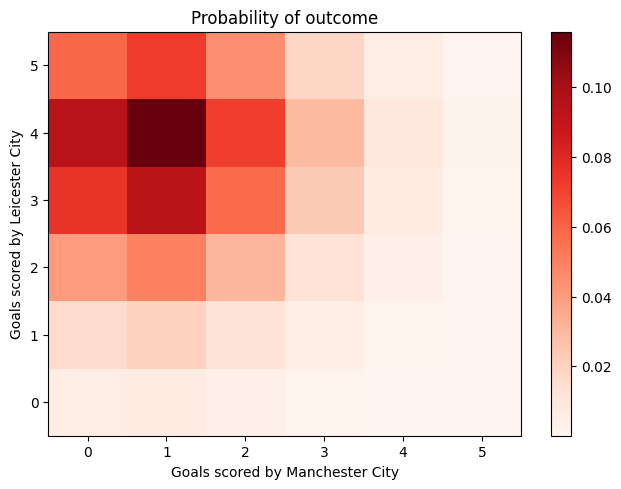

In [ ]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team, max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar times que tiveram campanhas "sortudas" ou "azaradas"?

In [ ]:
# Criando a tabela final simulada
tabela_simulada = pd.DataFrame(columns=["PTS", "J", "V", "E", "D", "GP", "GC", "SG"])
tabela_simulada.index.name = "Team"

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Extraindo times
    home_team, away_team = row["HT"], row["AT"]

    # Calculando expectativas de gols com o modelo de Poisson
    home_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [home_team], 'opponent': [away_team], 'home': [1]
    })).iloc[0]

    away_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [away_team], 'opponent': [home_team], 'home': [0]
    })).iloc[0]

    print(f"{home_team} contra {away_team}: Esperado {home_score_rate:.2f} x {away_score_rate:.2f}")

    # Determinar pontos e resultado
    if abs(home_score_rate - away_score_rate) < 0.5:  # Empate
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1
    elif home_score_rate > away_score_rate:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    else:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_simulada, home_team, pontos_casa, home_score_rate, away_score_rate, resultado_casa)
    atualizar_tabela(tabela_simulada, away_team, pontos_fora, away_score_rate, home_score_rate, resultado_fora)

tabela_simulada[["GP", "GC", "SG"]] = tabela_simulada[["GP", "GC", "SG"]].round(2)

# Resetando o índice para exibição
tabela_simulada = tabela_simulada.sort_values(by=["PTS", "SG", "GP"], ascending=[False, False, False])

Bournemouth contra Aston Villa: Esperado 1.87 x 0.87
Chelsea contra Swansea City: Esperado 1.76 x 1.07
Everton contra Watford: Esperado 1.60 x 1.04
Leicester City contra Sunderland: Esperado 2.34 x 0.83
Manchester United contra Tottenham Hotspur: Esperado 0.83 x 1.12
Norwich City contra Crystal Palace: Esperado 1.10 x 1.19
Arsenal contra West Ham United: Esperado 1.80 x 1.14


<ipython-input-96-2ec1d98555db>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.869514684777023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GP"] += gols_pro  # Gols Pró
<ipython-input-96-2ec1d98555db>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8655523370068989' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GC"] += gols_contra  # Gols Contra
<ipython-input-96-2ec1d98555db>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.003962347770124' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de 

Newcastle United contra Southampton: Esperado 0.93 x 1.72
Stoke City contra Liverpool: Esperado 1.15 x 1.64
West Bromwich Albion contra Manchester City: Esperado 0.80 x 1.59
Aston Villa contra Manchester United: Esperado 0.55 x 1.61
Southampton contra Everton: Esperado 1.79 x 1.13
Sunderland contra Norwich City: Esperado 1.76 x 1.17
Swansea City contra Newcastle United: Esperado 1.55 x 0.99
Tottenham Hotspur contra Stoke City: Esperado 2.14 x 0.59
Watford contra West Bromwich Albion: Esperado 1.06 x 0.77
West Ham United contra Leicester City: Esperado 1.37 x 1.62
Crystal Palace contra Arsenal: Esperado 0.81 x 1.41
Manchester City contra Chelsea: Esperado 2.18 x 1.17
Liverpool contra Bournemouth: Esperado 2.34 x 1.08
Crystal Palace contra Aston Villa: Esperado 1.59 x 0.63
Leicester City contra Tottenham Hotspur: Esperado 1.20 x 1.19
Manchester United contra Newcastle United: Esperado 1.73 x 0.66
Norwich City contra Stoke City: Esperado 1.27 x 1.24
Sunderland contra Swansea City: Esperad

In [ ]:
# Exibir tabela final
print(tabela_simulada)

                      PTS   J   V   E   D     GP     GC     SG
Team                                                          
Tottenham Hotspur     100  38  31   7   0  70.12  30.71  39.40
Leicester City         92  38  27  11   0  68.73  36.24  32.49
Manchester City        89  38  26  11   1  71.75  40.99  30.75
Arsenal                85  38  24  13   1  63.58  36.49  27.09
Southampton            71  38  18  17   3  56.51  40.74  15.77
West Ham United        70  38  18  16   4  65.70  50.16  15.54
Manchester United      66  38  15  21   2  47.73  34.74  12.99
Liverpool              65  38  16  17   5  63.42  49.97  13.45
Chelsea                56  38  13  17   8  59.24  53.73   5.51
Everton                53  38  13  14  11  58.16  56.08   2.08
Watford                32  38   4  20  14  39.36  49.09  -9.73
Crystal Palace         32  38   4  20  14  38.74  48.51  -9.77
Swansea City           32  38   4  20  14  41.99  52.75 -10.75
Sunderland             30  38   4  18  16  47.09  61.36

#### **Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar times que tiveram campanhas "sortudas" ou "azaradas"?**

<p>De forma geral, a simulação superestimou os times que tiveram boas campanhas e subestimou os que tiveram desempenhos ruins. Em especial, o fator mais impactante para o modelo foi o saldo de gols.

O modelo faz a simplificação plausível (mas errada) de que marcar muitos gols e sofrer poucos é o fator principal que leva um time a ser campeão. A realidade possui mais nuances. Por motivos físicos (ou mesmo táticos), alguns times se contentam com placares magros mesmo diante de adversários mais fracos, principalmente se possuem boas defesas. O modelo não leva em conta a diferença entre gols de empate, desempate ou nenhum deles e com isso acabou superestimando o Tottenham que, apesar de ter sofrido menos gols que o Leicester (campeão), sofreu gols em mais jogos.

Um fator importante que está parcialmente incluído nos dados mas não foi levado em consideração é o valor da partida para cada time. O Leicester, por exemplo, foi campeão com duas rodadas de antecedência, levando a um desempenho inferior nas últimas rodadas se comparado com o que teria sido se o título estivesse em disputa. Se os dados incluem informações como quantas posições um time pode ganhar vencendo o próximo jogo ou quais posições finais são possíveis, ele não inclui informações relevantes como quais times são rebaixados e seu peso para cada um dos times.

Fora isso, existem os fatores que não estão contidos nos dados mas possuem grande influência. O momento de cada time ou jogador, lesões, trocas de treinadores e contratações/vendas afetam o desempenho do time.

Em resumo, a simulação reflete uma visão mais "idealizada" do desempenho dos times, enquanto a realidade inclui variáveis imprevisíveis que o modelo não consegue prever completamente.</p>